In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
logfiles = []
for root, dirs, files in os.walk('../'):
    for file in files:
        if file == 'logs.csv':
            logfiles.append(os.path.join(root, file))
            
logfiles_dict = {os.path.dirname(logfile).split('\\')[1]: pd.read_csv(logfile) for logfile in logfiles}
for key, val in logfiles_dict.items():
    val['source'] = key
    val = val.rename(columns={'Var1':'value', 'Var2':'metric', 'Var3':'followflowfront', 'Var4':'cut_at', 'Var5':'ideal_threshold', 
                              'Var6':'slope', 'Var7':'sigma', 'Var8':'fraction'})
    logfiles_dict[key] = val
    
logdfs = list(logfiles_dict.keys())

In [29]:
logdfs

['i_05_no_bl_80',
 'i_07_no_bl_90',
 'i_1_no_bl_80',
 'lyukas_13_no_bl_80_rm',
 't_05_no_bl_90',
 't_07_no_bl_80',
 't_1_no_bl_80',
 'u_05_no_bl_80',
 'u_07_no_bl_80',
 'u_1_no_bl_90']

In [39]:
ignore_list = ['lyukas_13_no_bl_80_rm']
to_concat = [logfiles_dict[logdf] for logdf in logdfs if logdf not in ignore_list]
combined_logs = pd.concat(to_concat, ignore_index=True)
combined_logs['value_metric'] = combined_logs['value'] + ' - ' + combined_logs['metric']



In [50]:
combined_logs

,value,metric,followflowfront,cut_at,ideal_threshold,slope,sigma,fraction,source,value_metric
0,shearrate,max-min,no,cumvar max,1.70,-0.490447,0.228304,0.180158,i_05_no_bl_80,shearrate - max-min
1,shearrate,(max-min)/mean,no,cumvar max,1.75,-0.357406,0.181585,0.130447,i_05_no_bl_80,shearrate - (max-min)/mean
2,shearrate,(max-min)/max,no,cumvar max,1.55,-0.581599,0.221314,0.142389,i_05_no_bl_80,shearrate - (max-min)/max
3,temperature,max-min,yes,deriv min,2.60,-0.057979,0.056417,0.214695,i_05_no_bl_80,temperature - max-min
4,temperature,(max-min)/mean,yes,deriv min,2.45,-0.057191,0.050504,0.211156,i_05_no_bl_80,temperature - (max-min)/mean
...,...,...,...,...,...,...,...,...,...,...
103,length of velocity vector,(max-min)/mean,no,deriv min,1.65,-0.192207,0.092968,0.209126,u_1_no_bl_90,length of velocity vector - (max-min)/mean
104,length of velocity vector,(max-min)/max,no,deriv min,1.20,-0.052085,0.010154,0.559937,u_1_no_bl_90,length of velocity vector - (max-min)/max
105,angle of velocity vector,max-min,no,cumvar max,4.15,-0.040542,0.081811,0.077910,u_1_no_bl_90,angle of velocity vector - max-min
106,angle of velocity vector,(max-min)/mean,no,no cut,5.50,-0.033094,0.091394,0.075903,u_1_no_bl_90,angle of velocity vector - (max-min)/mean


In [51]:
sigmas = combined_logs.pivot(index='source', columns='value_metric', values='sigma')
slopes = combined_logs.pivot(index='source', columns='value_metric', values='slope')
fractions = combined_logs.pivot(index='source', columns='value_metric', values='fraction')
ideal_thresholds = combined_logs.pivot(index='source', columns='value_metric', values='ideal_threshold')
cut_ats = combined_logs.pivot(index='source', columns='value_metric', values='cut_at')


In [55]:
sigmas

value_metric,angle of velocity vector - (max-min)/max,angle of velocity vector - (max-min)/mean,angle of velocity vector - max-min,length of velocity vector - (max-min)/max,length of velocity vector - (max-min)/mean,length of velocity vector - max-min,shearrate - (max-min)/max,shearrate - (max-min)/mean,shearrate - max-min,temperature - (max-min)/max,temperature - (max-min)/mean,temperature - max-min
source,,,,,,,,,,,,
i_05_no_bl_80,0.210294,0.173238,0.209214,0.037748,0.082497,0.186659,0.221314,0.181585,0.228304,0.056548,0.050504,0.056417
i_07_no_bl_90,0.191249,0.143332,0.188378,0.017540,0.095437,0.194852,0.211012,0.174468,0.229753,0.083668,0.059331,0.071596
i_1_no_bl_80,0.115940,0.076951,0.111001,0.001219,0.094739,0.183859,0.190694,0.154425,0.231420,0.093403,0.067286,0.093284
t_05_no_bl_90,0.088252,0.159625,0.121958,0.043193,0.082715,0.121706,0.237446,0.199992,0.137412,0.055655,0.045043,0.061701
t_07_no_bl_80,0.110986,0.060248,0.105495,0.016422,0.095222,0.118310,0.214830,0.180049,0.121084,0.069644,0.050252,0.069457
t_1_no_bl_80,0.087573,0.036622,0.076708,0.001797,0.080643,0.124836,0.203742,0.171370,0.116665,0.094962,0.063996,0.094484
u_05_no_bl_80,0.211403,0.160995,0.161052,0.041766,0.081313,0.180393,0.220060,0.182441,0.212034,0.059102,0.048959,0.058980
u_07_no_bl_80,0.196447,0.135146,0.135592,0.016514,0.093626,0.188782,0.201427,0.166937,0.218530,0.077885,0.055805,0.077685
u_1_no_bl_90,0.163725,0.091394,0.081811,0.010154,0.092968,0.180366,0.196394,0.159933,0.219418,0.124811,0.087902,0.125113


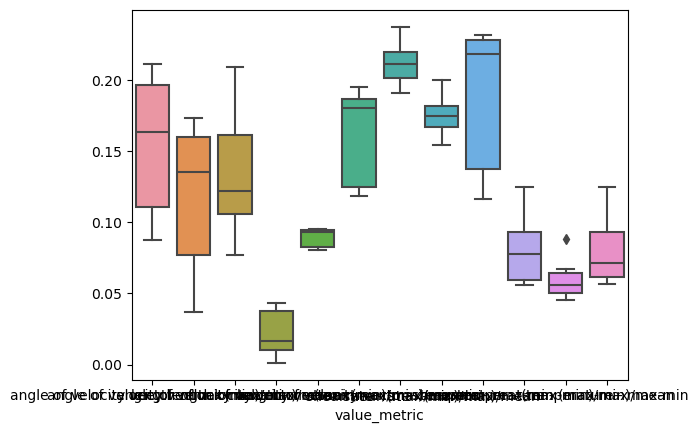

In [69]:
sns.boxplot(sigmas)
plt.show()

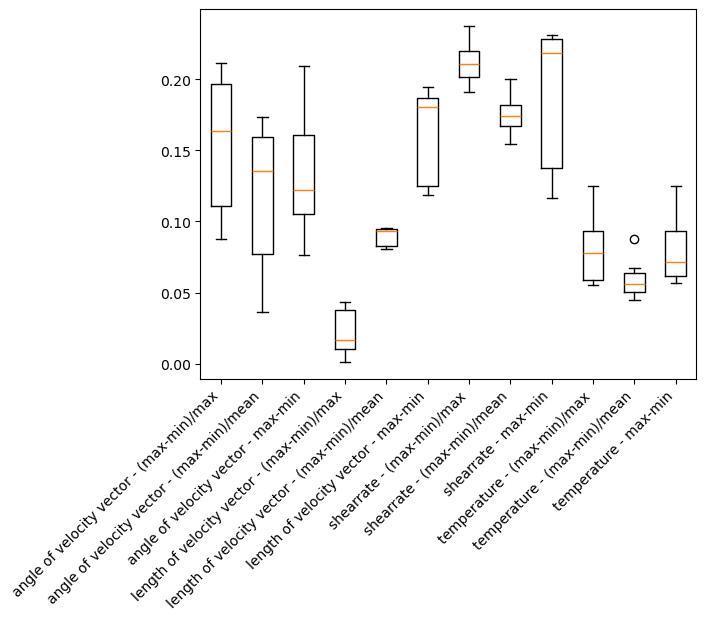

In [66]:
plt.boxplot(sigmas)
plt.xticks(ticks=range(1, len(sigmas.columns) + 1), labels=sigmas.columns, rotation=45, ha='right')
plt.show()

c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


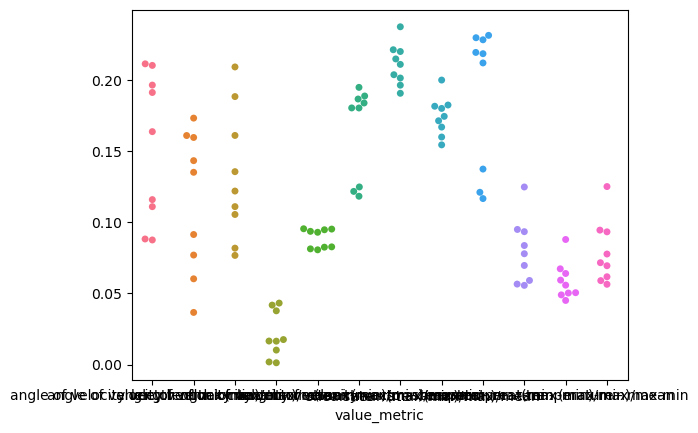

In [70]:
sns.swarmplot(sigmas)
plt.show()

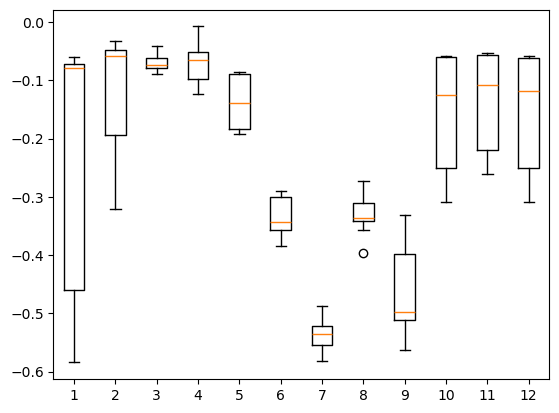

In [71]:
plt.boxplot(slopes)
plt.show()

c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value_metric'>

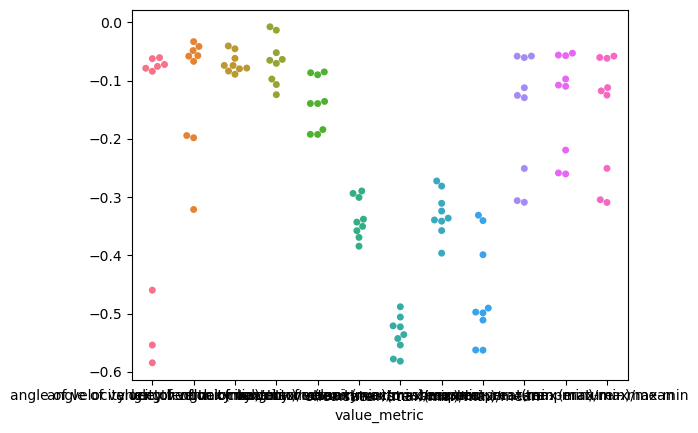

In [60]:
sns.swarmplot(slopes)

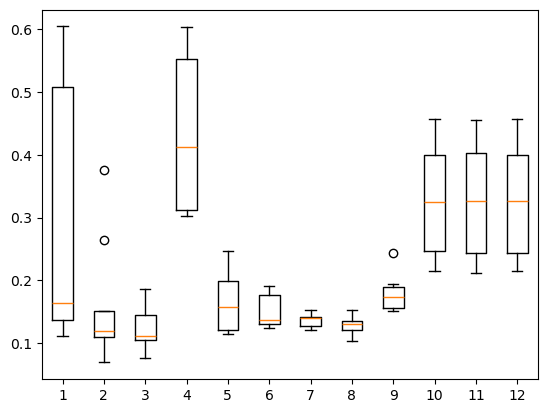

In [72]:
plt.boxplot(fractions)
plt.show()

c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSANADANSYS\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='value_metric'>

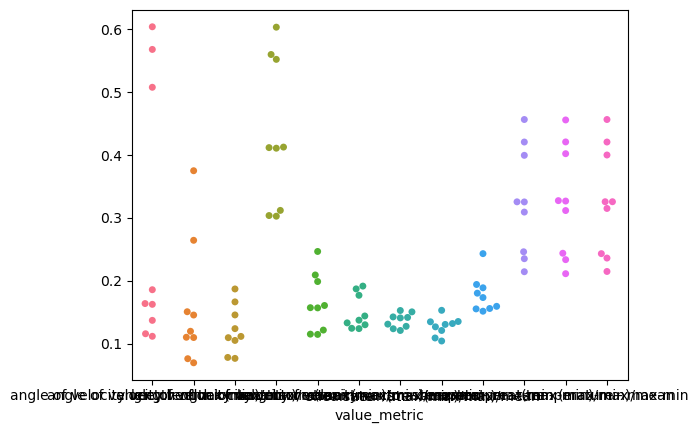

In [62]:
sns.swarmplot(fractions)